# Algoritmo di discesa del gradiente

Sia $f: \mathbf{R}^2 \rightarrow \mathbf{R}$, definita nel seguente modo:

$$ f(x, y) = x^2 + y^2 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def f(x):
    return x[0]**2 + x[1]**2

Calcolando il gradiente, si ottiene:

$$
\nabla f = \left( 2x, 2y \right)
$$

In [2]:
def f_gradient(x):
    return np.array([2 * x[0], 2 * x[1]])

Creiamo una meshgrid per visualizzare la funzione:

In [3]:
lin_x = np.linspace(-5, 5)
lin_y = np.linspace(-5, 5)

x = np.meshgrid(lin_x, lin_y)

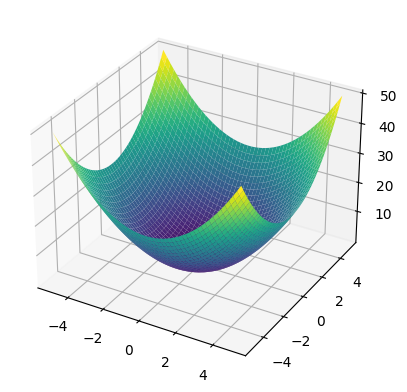

In [4]:
ax = plt.axes(projection='3d')
ax.plot_surface(*x, f(x), cmap=cm.viridis)

L'algoritmo iterativo di discesa del gradiente è definito nel seguente modo:

$$
\begin{cases}
x_0 &= a\\
x_{k+1} &= x_k - \eta \nabla f(x_k) 
\end{cases}
$$

dove $a$ è un punto nel dominio di $f$ e $\eta \in \mathbf{R}$, $\eta > 0$ un iperparametro dell'algoritmo. 

In [5]:
def cerca_minimo(x_0, eta, iterazioni):

    x = [x_0]

    for _ in range(iterazioni - 1):

        x_k = x[-1] - eta * f_gradient(x[-1])

        x.append(x_k)

    return np.array(x).transpose()

Applichiamo il metodo iterativo per $n = 100$ iterazioni e con $\eta = 0.1$, partendo dal punto $x_0 = (-5, 5)$

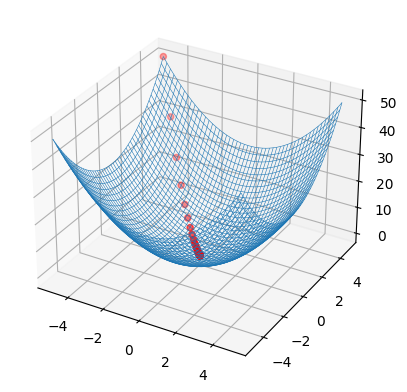

In [17]:
n_iterazioni = 100

eta = 0.1

x_0 = np.array([-5, 5])

min_x = cerca_minimo(x_0, eta, n_iterazioni)

ax2 = plt.axes(projection='3d')

ax2.plot_wireframe(*x, f(x), linewidth=0.4)
ax2.scatter(*min_x, f(min_x), c='r')

plt.show()

Per ridurre il numero di iterazioni, si può indicare una condizione di uscita. Ad esempio, quando il valore calcolato $y$ è sufficientemente vicino al valore ideale $y^*$ cui vorremmo arrivare. Usiamo quindi la metrica euclidea su $\mathbf{R}$:

$$
\text{errore}(y, y^*) = \left| y - y^* \right|
$$

In [7]:
def errore(x, y):
    return np.abs( x - y )

def cerca_minimo_err(x_0, eta, iterazioni):

    min_locale = 0

    epsilon = 0.001

    x = [x_0]

    i = 0
    while errore(f(x[-1]), min_locale) > epsilon and i < iterazioni:

        x_k = x[-1] - eta * f_gradient(x[-1])

        x.append(x_k)

        i += 1
    
    print("Numero di iterazioni:", i)

    return np.array(x).transpose()

Numero di iterazioni: 25


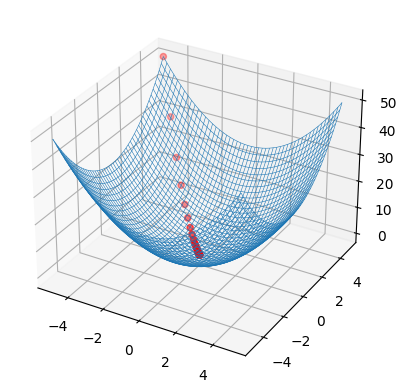

In [8]:
min_x = cerca_minimo_err(x_0, eta, n_iterazioni)

ax3 = plt.axes(projection='3d')

ax3.plot_wireframe(*x, f(x), linewidth=0.4)
ax3.scatter(*min_x, f(min_x), c='r')

plt.show()